<a href="https://colab.research.google.com/github/mehrnazeraeisi/Spectral-Clustering/blob/main/Example_of_SpectralClustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

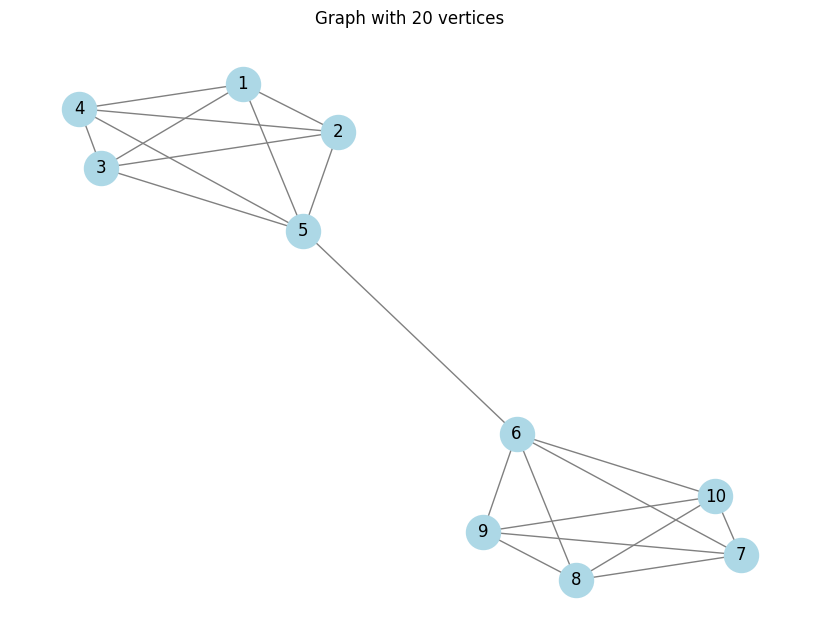

Laplacian Matrix:
 [[ 4 -1 -1 -1 -1  0  0  0  0  0]
 [-1  4 -1 -1 -1  0  0  0  0  0]
 [-1 -1  4 -1 -1  0  0  0  0  0]
 [-1 -1 -1  4 -1  0  0  0  0  0]
 [-1 -1 -1 -1  5 -1  0  0  0  0]
 [ 0  0  0  0 -1  5 -1 -1 -1 -1]
 [ 0  0  0  0  0 -1  4 -1 -1 -1]
 [ 0  0  0  0  0 -1 -1  4 -1 -1]
 [ 0  0  0  0  0 -1 -1 -1  4 -1]
 [ 0  0  0  0  0 -1 -1 -1 -1  4]]

Eigenvalues:
 [-1.40165657e-15  2.98437881e-01  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  6.70156212e+00]

Eigenvectors (columns):
 [[-3.16227766e-01 -3.33622992e-01  4.31192234e-05  0.00000000e+00
   8.80335390e-01  0.00000000e+00 -6.37370810e-05  2.56773001e-03
   1.73276938e-03  1.17028626e-01]
 [-3.16227766e-01 -3.33622992e-01 -5.77642901e-01 -3.26411629e-01
  -2.53948910e-01 -2.05618756e-01  6.10585881e-02 -3.05041939e-01
  -3.62265469e-01  1.17028626e-01]
 [-3.16227766e-01 -3.33622992e-01  5.08321847e-01  3.27416895e-01
  -2.54058624e-01  2.26380993e-01 -6.96132993

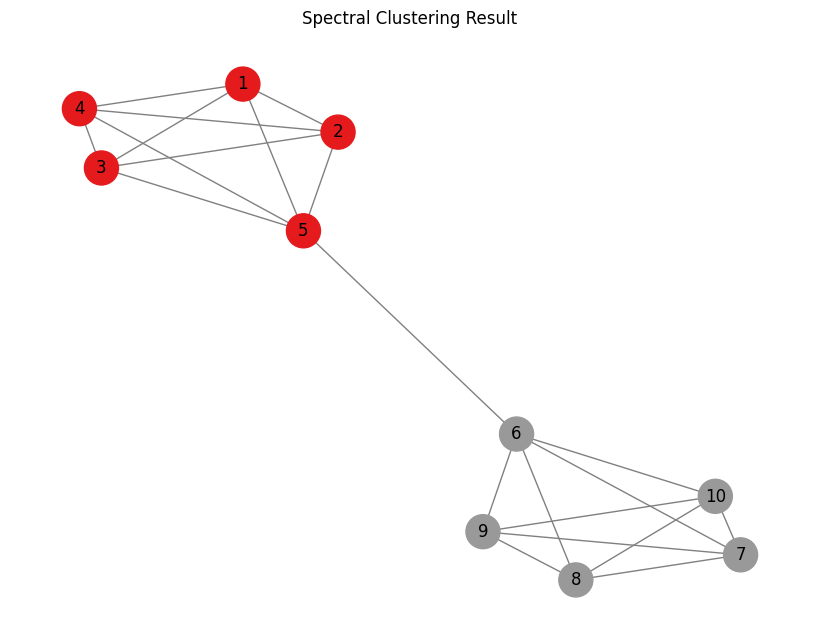

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# --- ساخت گراف ---
G = nx.Graph()

# اضافه کردن رئوس
G.add_nodes_from(range(1, 11))

# مولفه اول: گراف کامل روی {1,2,3,4,5}
for i in range(1, 6):
    for j in range(i+1, 6):
        G.add_edge(i, j, weight=1)

# مولفه دوم: گراف کامل روی {6,7,8,9,10}
for i in range(6, 11):
    for j in range(i+1, 11):
        G.add_edge(i, j, weight=1)

# یال بین رأس 5 و 6
G.add_edge(5, 6, weight=1)

# --- رسم گراف ---
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=600, edge_color='gray')
plt.title("Graph with 20 vertices")
plt.show()

# --- محاسبه ماتریس لاپلاسین ---
L = nx.laplacian_matrix(G).todense()
print("Laplacian Matrix:\n", L)

# --- مقادیر و بردارهای ویژه ---
eigvals, eigvecs = np.linalg.eigh(L)
print("\nEigenvalues:\n", eigvals)
print("\nEigenvectors (columns):\n", eigvecs)

# --- تجزیه طیفی (خوشه بندی) ---
# انتخاب k=2 (چون دو بخش عمده داریم)
k = 2
# بردارهای ویژه متناظر با کوچکترین k مقدار ویژه
X = eigvecs[:, :k]
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
labels = kmeans.labels_

# نمایش نتایج خوشه بندی طیفی
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color=labels, cmap=plt.cm.Set1, node_size=600, edge_color='gray')
plt.title("Spectral Clustering Result")
plt.show()
